In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import cv2

/home/the0lem/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


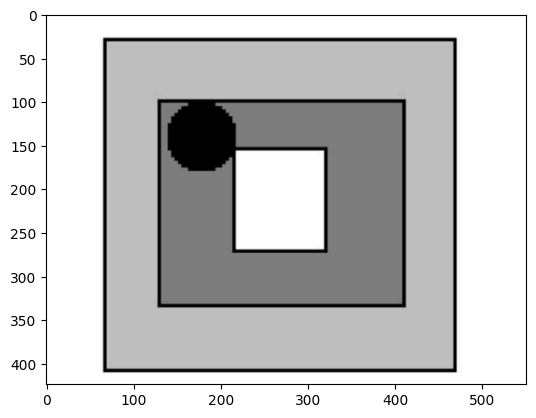

In [2]:
image_path = 'aule_space.png'
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

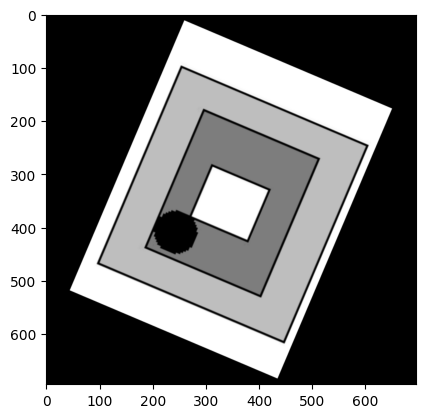

In [3]:
#rotatinig the image 
height,width,_ = image.shape
diagonal = np.sqrt(height**2 + width**2)
new_height = int(diagonal)
new_width = int(diagonal)


T = cv2.getRotationMatrix2D((width/2,height/2),67,1)
T[0,2] += (new_width - width)/2  
T[1,2] += (new_height - height)/2   

rot_image = cv2.warpAffine(image,T,(new_height,new_width))
plt.imshow(rot_image)
plt.show()

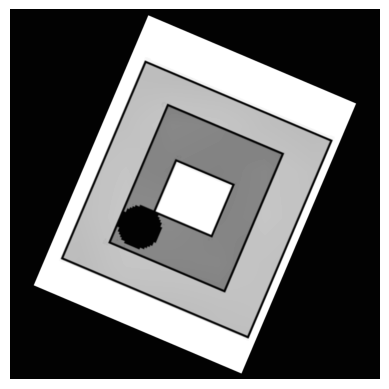

In [4]:
gray = cv2.cvtColor(rot_image,cv2.COLOR_BGR2GRAY)
gray = np.uint8(gray)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced = clahe.apply(gray)

plt.imshow(enhanced, cmap='gray')
plt.axis('off')
plt.show()

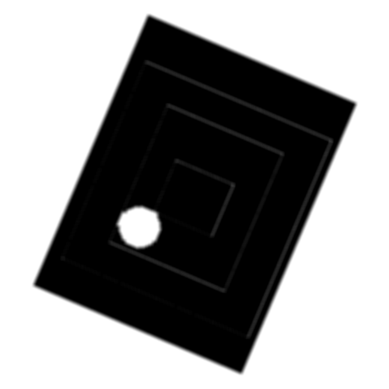

In [5]:


_, thresh = cv2.threshold(gray, 0.1, 255, cv2.THRESH_BINARY_INV)
blurred = cv2.GaussianBlur(thresh, (9, 9), 5)



plt.imshow(blurred, cmap='gray')
plt.axis('off')
plt.show()


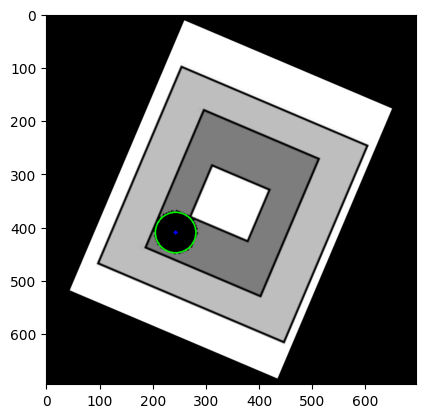

In [6]:
circles = cv2.HoughCircles(
    blurred, 
    cv2.HOUGH_GRADIENT, dp=1.2, minDist=30,
    param1=200, param2=20, minRadius=5, maxRadius=50
)

output = rot_image.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))  # Convert to integer
    for i in circles[0, :]:
        x, y, r = i
        cv2.circle(output, (x, y), r, (0, 255, 0), 2)  # Green circle
        cv2.circle(output, (x, y), 2, (0, 0, 255), 3)  # Red center

plt.imshow(output)

plt.show()

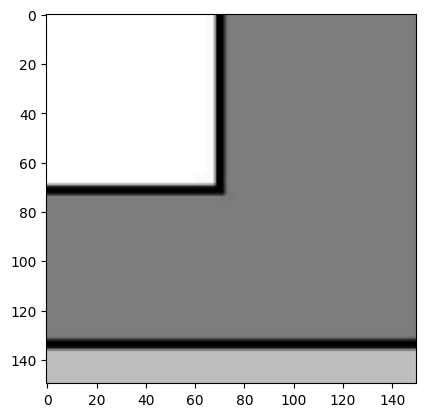

In [7]:
x, y, w, h = 250, 200, 150, 150 
cropped_image = image[y:y+h, x:x+w]

plt.imshow(cropped_image)
plt.show()

In [26]:
crop_path = "cropped_image.png"
cropped_image = cv2.imread(crop_path)

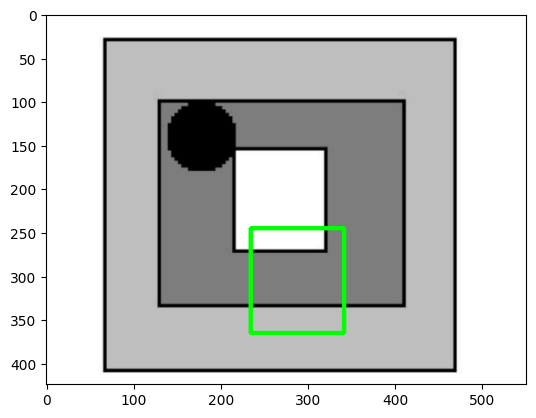

In [27]:
if original_image is None or cropped_image is None:
    print("Error: One or both images not found. Please check the file paths.")
else:
    # Convert both images to grayscale
    gray_original = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    gray_cropped = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)

    # Perform template matching
    result = cv2.matchTemplate(gray_original, gray_cropped, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    # Get top-left corner of matched region
    top_left = max_loc
    h, w = gray_cropped.shape

    # Draw a rectangle around the matched region
    highlighted_image = original_image.copy()
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(highlighted_image, top_left, bottom_right, (0, 255, 0), 3)

    plt.imshow(cv2.cvtColor(highlighted_image, cv2.COLOR_BGR2RGB))    
    plt.show()

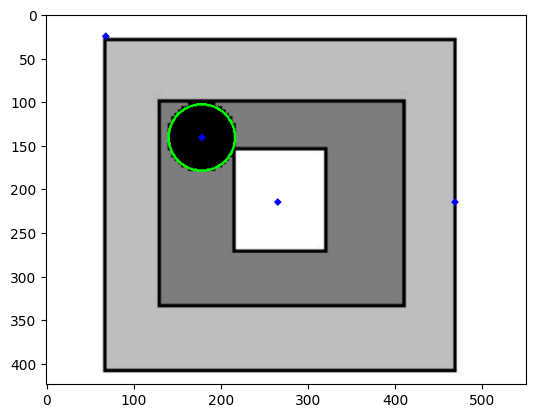

178 141 38


In [10]:
#Find centre
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray = np.uint8(gray)
_, thresh = cv2.threshold(gray, 0.1, 255, cv2.THRESH_BINARY_INV)
blurred = cv2.GaussianBlur(thresh, (9, 9), 5)
circles = cv2.HoughCircles(
    blurred, 
    cv2.HOUGH_GRADIENT, dp=1.2, minDist=30,
    param1=200, param2=20, minRadius=5, maxRadius=50
)

output = image.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))  # Convert to integer
    for i in circles[0, :]:
        x, y, r = i
        cv2.circle(output, (x, y), r, (0, 255, 0), 2)  # Green circle
        cv2.circle(output, (x, y), 2, (0, 0, 255), 3)  # Red center
        cv2.circle(output, (265, 215), 2, (0, 0, 255), 3)  # Red center
        cv2.circle(output, (68, 25), 2, (0, 0, 255), 3)
        cv2.circle(output, (468, 215), 2, (0, 0, 255), 3)  
# Apply centering transformation
        

plt.imshow(output)

plt.show()

port_centre = circles[0,0]
x,y,r = port_centre
print(x,y,r)

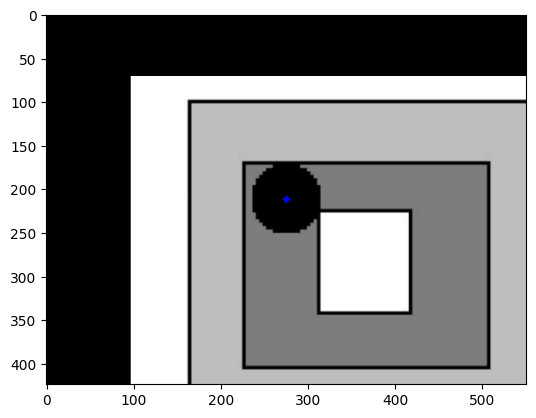

In [11]:

h, w = image.shape[:2]  # Get image dimensions

# Given key points
center_screen = (int(w/2), int(h/2)),  # Original screen center
center_circle = (178,141)  # New camera center

# Compute translation to center the camera on the circle
dx = int(w/2)-178  # Horizontal shift
dy = int(h/2)-141  # Vertical shift

# Define original corner points of the image
original_pts = np.float32([
    [0, 0],        # Top-left
    [w, 0],        # Top-right
    [0, h],        # Bottom-left
    [w, h]         # Bottom-right
])

# Define new points after centering to the circle
new_pts = np.float32([
    [dx, dy],           # Move top-left
    [w+ dx, dy],        # Move top-right
    [dx, h + dy],        # Move bottom-left
    [w + dx, h + dy]      # Move bottom-right
])

# Compute homography matrix to center the camera on the circle
H_center = cv2.getPerspectiveTransform(original_pts, new_pts)

# Apply centering transformation
centered_image = cv2.warpPerspective(image, H_center, (w, h))
cv2.circle(centered_image, (int(w/2), int(h/2)), 2, (0, 0, 255), 3)

plt.imshow(centered_image)
plt.show()


In [12]:
print(w/2,h/2)

275.5 212.0


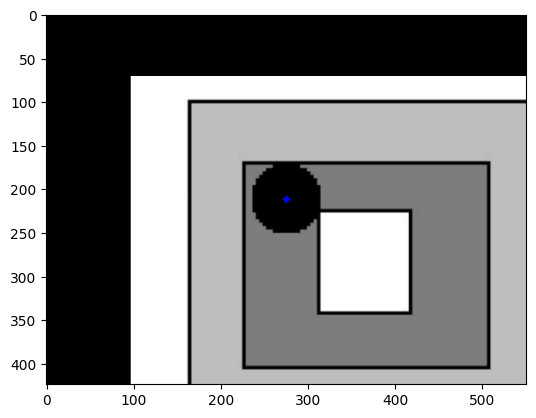

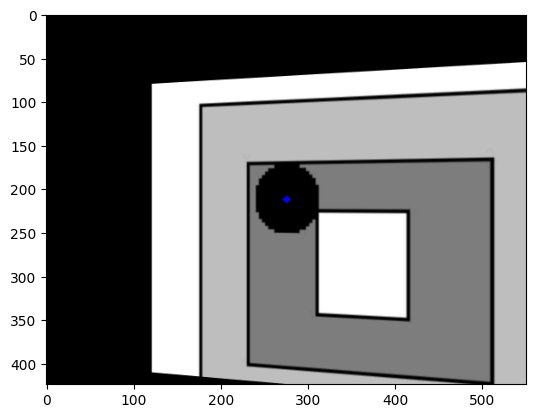

In [16]:
# Now apply perspective shift for the right-side 22.5° view
shift_right =45  # Move right
tilt_factor =20  # Adjust perspective for angled view

# Define new points for the right-side view
new_pts_right = np.float32([
    [shift_right, tilt_factor],      # Top-left shifts right & up
    [w+10, -25],                          # Top-right stays the same
    [shift_right, h - tilt_factor],  # Bottom-left shifts right & down
    [w+10, h + 25]                           # Bottom-right stays the same
])

# Compute homography matrix for the right-side view
H_right = cv2.getPerspectiveTransform(original_pts, new_pts_right)

# Apply the right-side perspective warp
final_image = cv2.warpPerspective(centered_image, H_right, (w, h))



cv2.circle(centered_image, (int(w/2), int(h/2)), 2, (0, 0, 255), 3)
cv2.circle(final_image, (int(w/2), int(h/2)), 2, (0, 0, 255), 3)

plt.imshow(centered_image)
plt.show()
plt.imshow(final_image)
plt.show()


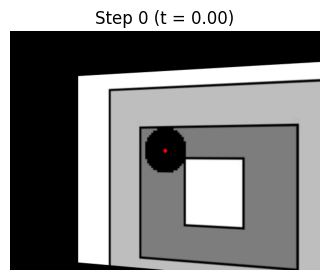

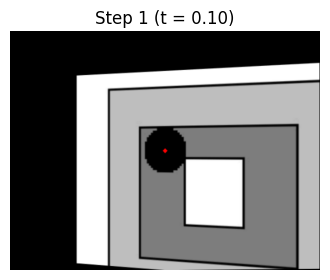

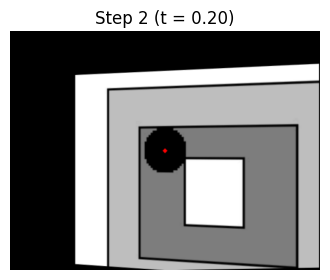

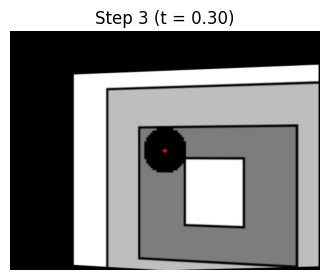

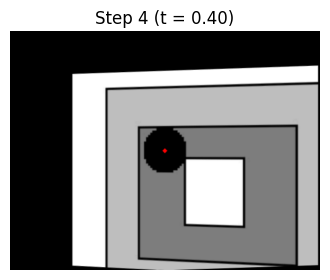

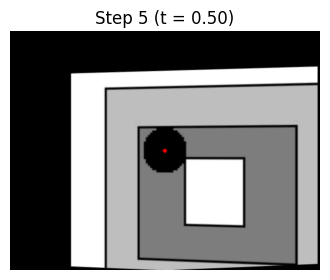

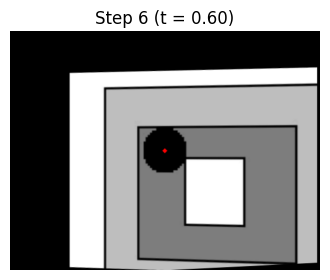

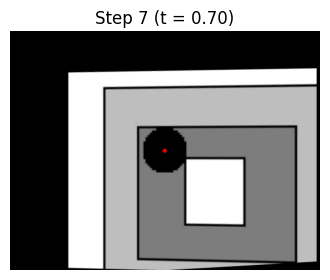

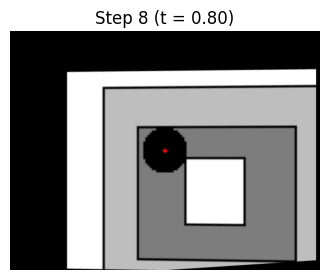

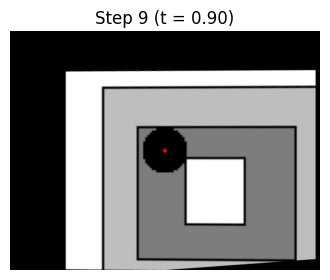

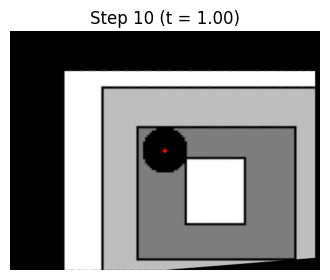

In [23]:


# Number of incremental steps in the transformation
N_transform = 10

shift_right = 45  # Move right
tilt_factor = 20  # Adjust perspective for angled view

# Define new points for the right-side view (example values)
new_pts_right = np.float32([
    [shift_right, tilt_factor],       # Top-left: shifts right & up
    [w + 10, -25],                    # Top-right: shifted slightly right & up
    [shift_right, h - tilt_factor],   # Bottom-left: shifts right & down
    [w + 10, h + 25]                  # Bottom-right: shifted slightly right & down
])

# original_pts for the front view (example values)
original_pts = np.float32([
    [0, 0],        # Top-left
    [w, 0],        # Top-right
    [0, h],        # Bottom-left
    [w, h]         # Bottom-right
])

# Compute homography for the right-side view
H_right = cv2.getPerspectiveTransform(original_pts, new_pts_right)
final_image = cv2.warpPerspective(centered_image, H_right, (w, h))

# --- Now, convert the final (right-side) image back to the original view gradually ---
# Interpolate between new_pts_right (right view) and original_pts (front view)

for k in range(N_transform + 1):
    # Compute interpolation factor (0.0 for right view, 1.0 for original view)
    t = k / N_transform
    
    # Interpolate the corner points:
    # When t = 0, new_pts_k equals new_pts_right (right view).
    # When t = 1, new_pts_k equals original_pts (front view).
    new_pts_k = (1 - t) * new_pts_right + t * original_pts
    new_pts_k = new_pts_k.astype(np.float32)
    
    # Compute the homography mapping from the right-side view's coordinate system 
    # (i.e. new_pts_right) to the intermediate view (new_pts_k).
    H_k = cv2.getPerspectiveTransform(new_pts_right, new_pts_k)
    
    # Warp the final_image (which is the right-side view) using H_k.
    warped = cv2.warpPerspective(final_image, H_k, (w, h))
    
    # Convert color for display (if using matplotlib, which expects RGB)
    warped_rgb = cv2.cvtColor(warped, cv2.COLOR_BGR2RGB)
    
    # Display the intermediate warped image
    plt.figure(figsize=(4, 4))
    plt.imshow(warped_rgb)
    plt.title(f"Step {k} (t = {t:.2f})")
    plt.axis('off')
    plt.show()
